In [3]:
import numpy as np

# Активация — сигмоида
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Производная сигмоиды
def sigmoid_derivative(x):
    return x * (1 - x)

class MLP:
    def __init__(self, x, y, learning_rate=0.1):
        self.input = x                      # Входные данные
        self.y = y                          # Истинные метки
        self.lr = learning_rate             # Скорость обучения

        input_size = self.input.shape[1]

        # Инициализация весов
        self.weights1 = np.random.randn(input_size, 6) * 0.1   # Вход → скрытый слой 1 (6 нейронов)
        self.bias1 = np.zeros((1, 6))

        self.weights2 = np.random.randn(6, 4) * 0.1            # Скрытый слой 1 → скрытый слой 2 (4 нейрона)
        self.bias2 = np.zeros((1, 4))

        self.weights3 = np.random.randn(4, 1) * 0.1            # Скрытый слой 2 → выход
        self.bias3 = np.zeros((1, 1))

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1) + self.bias1)
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2) + self.bias2)
        self.output = sigmoid(np.dot(self.layer2, self.weights3) + self.bias3)

    def backprop(self):
        # Ошибка на выходе
        error_output = self.output - self.y
        d_output = error_output * sigmoid_derivative(self.output)

        # Градиент для второго скрытого слоя
        error_layer2 = np.dot(d_output, self.weights3.T)
        d_layer2 = error_layer2 * sigmoid_derivative(self.layer2)

        # Градиент для первого скрытого слоя
        error_layer1 = np.dot(d_layer2, self.weights2.T)
        d_layer1 = error_layer1 * sigmoid_derivative(self.layer1)

        # Обновление весов и смещений (с вычитанием градиента)
        self.weights3 -= np.dot(self.layer2.T, d_output) * self.lr
        self.bias3 -= np.sum(d_output, axis=0, keepdims=True) * self.lr

        self.weights2 -= np.dot(self.layer1.T, d_layer2) * self.lr
        self.bias2 -= np.sum(d_layer2, axis=0, keepdims=True) * self.lr

        self.weights1 -= np.dot(self.input.T, d_layer1) * self.lr
        self.bias1 -= np.sum(d_layer1, axis=0, keepdims=True) * self.lr

    def train(self, epochs=10000, learning_rate = 0.01, verbose=False):
        self.learning_rate=learning_rate
        for epoch in range(epochs):
            self.feedforward()
            self.backprop()
            if verbose and epoch % 1000 == 0:
                loss = np.mean(np.square(self.y - self.output))
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def predict(self, x):
        # Предсказание для новых данных
        layer1 = sigmoid(np.dot(x, self.weights1) + self.bias1)
        layer2 = sigmoid(np.dot(layer1, self.weights2) + self.bias2)
        output = sigmoid(np.dot(layer2, self.weights3) + self.bias3)
        return output

    def print_output(self):
        print(self.output)

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from lightgbm import LGBMClassifier

In [5]:
df = pd.read_csv('heart_disease_dataset.csv', delimiter = ';')

In [6]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [8]:
for x in df:
    print(x, df[x].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
chest_pain_type [3 2 1 0]
resting_blood_pressure [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholesterol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 16

In [9]:
df['target'].unique()

array([1, 0], dtype=int64)

Young: <= 45
Middle aged: 46–55
Old: 56+

In [10]:
bins = [0, 45, 55, df['age'].max()]
labels = ['young', 'middle_aged', 'old']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

Heart-Healthy — < 200
At-Risk — 200–239
Dangerous — >= 240

In [11]:
bins = [0, 200, 239, df['cholesterol'].max()]
labels = ['heart_healthy', 'at_risk', 'dangerous']

df['cholesterol'] = pd.cut(df['cholesterol'], bins=bins, labels=labels, right=True)

Low	< 90
Normal	90 – 119
Prehypertension	120 – 139
High: Stage 1 Hypertension	140 – 159
High: Stage 2 Hypertension	>= 160

In [12]:
bins = [0, 90, 119, 139, 159, df['resting_blood_pressure'].max()]
labels = ['low', 'normal', 'prehypertension', 'high_stage1', 'high_stage2']

df['resting_blood_pressure'] = pd.cut(df['resting_blood_pressure'], bins=bins, labels=labels, right=True)

< 0.5	normal
0.5 – 1.0	borderline
1.0 – 2.0	abnormal
'>' 2.0	severe

In [ ]:
st_bins = [0, 0.5, 1.0, 2.0, df['st_depression'].max()]
st_labels = ['normal', 'borderline', 'abnormal', 'severe']

df['st_depression'] = pd.cut(df['st_depression'], bins=st_bins, labels=st_labels, right=False)

0-75 very light
75-100 light
100-125 moderately heavy
125-150 heavy
150-175 very heavy
175+ extremely heavy

In [14]:
heart_bins = [0, 75, 100, 125, 150, 175, df['max_heart_rate_achieved'].max()]
heart_labels = ['very light', 'light', 'Moderately heavy', 'heavy', 'very heavy', 'extremely heavy']

df['max_heart_rate_achieved'] = pd.cut(df['max_heart_rate_achieved'], bins=heart_bins, labels=heart_labels, right=False)

In [15]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,old,1,3,high_stage1,at_risk,1,0,very heavy,0,severe,0,0,1,1
1,young,1,2,prehypertension,dangerous,0,1,extremely heavy,0,severe,0,0,2,1
2,young,0,1,prehypertension,at_risk,0,0,very heavy,0,abnormal,2,0,2,1
3,old,1,1,prehypertension,at_risk,0,1,extremely heavy,0,borderline,2,0,2,1
4,old,0,0,prehypertension,dangerous,0,1,very heavy,1,borderline,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,old,0,0,high_stage1,dangerous,0,1,Moderately heavy,1,normal,1,0,3,0
299,young,1,3,normal,dangerous,0,1,heavy,0,abnormal,1,0,3,0
300,old,1,0,high_stage1,heart_healthy,1,1,heavy,0,severe,1,2,3,0
301,old,1,0,prehypertension,heart_healthy,0,1,Moderately heavy,1,abnormal,1,1,3,0


In [16]:
columns_to_encode = ['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate_achieved', 'st_depression']
le = LabelEncoder()
# Apply LabelEncoder to each specified column
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])

In [17]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,1,1,3,0,0,1,0,4,0,3,0,0,1,1
1,2,1,2,3,1,0,1,1,0,3,0,0,2,1
2,2,0,1,3,0,0,0,4,0,0,2,0,2,1
3,1,1,1,3,0,0,1,1,0,1,2,0,2,1
4,1,0,0,3,1,0,1,4,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,0,0,0,1,0,1,0,1,2,1,0,3,0
299,2,1,3,2,1,0,1,2,0,0,1,0,3,0
300,1,1,0,0,2,1,1,2,0,3,1,2,3,0
301,1,1,0,3,2,0,1,0,1,0,1,1,3,0


In [18]:
X = df.drop(['target'], axis = 1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
Counter(Y)

Counter({1: 165, 0: 138})

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Пермутационная важность
result = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Вывод
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': result.importances_mean
}).sort_values(by="Importance", ascending=False)

print(importance_df)

                    Feature  Importance
12              thalassemia    0.027322
6                  rest_ecg    0.018033
2           chest_pain_type    0.014208
11        num_major_vessels    0.001093
5       fasting_blood_sugar   -0.004372
7   max_heart_rate_achieved   -0.004918
8   exercise_induced_angina   -0.005464
9             st_depression   -0.008197
3    resting_blood_pressure   -0.008743
10                 st_slope   -0.010383
1                       sex   -0.015847
0                       age   -0.015847
4               cholesterol   -0.019126


In [21]:
X = np.array(X)
Y = np.array(Y).reshape(-1, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
mlp = MLP(X_train, y_train)
mlp.train(epochs=10000, learning_rate=0.01)

In [24]:
y_pred = mlp.predict(X_test)

mse = np.mean((y_pred - y_test)**2)
print("Test MSE:", mse)

Test MSE: 0.18961986734033326


Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



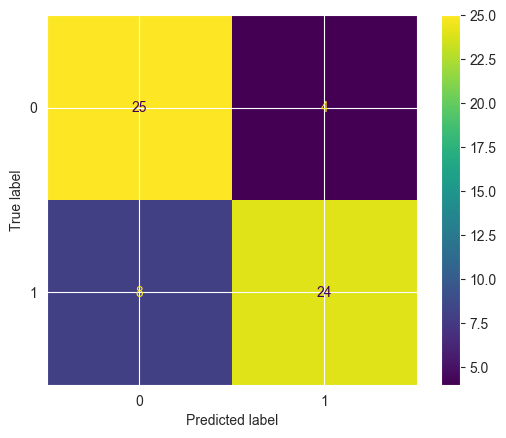

In [29]:
y_pred_class = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred_class)
print(f"Classification Report:")
print(report)

conf_m = confusion_matrix(y_test, y_pred_class)
labels = np.unique(y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=labels)
disp.plot()
plt.show()

In [31]:
modelgbm = LGBMClassifier(metric='auc')
# Fit the model on the training data
modelgbm.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_train = modelgbm.predict(X_train)
y_val = modelgbm.predict(X_test)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 45
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [32]:
from sklearn.metrics import roc_auc_score as ras

print("Training ROC-AUC: ", ras(y_train, y_train))
print("Validation ROC-AUC: ", ras(y_test, y_val))

Training ROC-AUC:  1.0
Validation ROC-AUC:  0.8372844827586207


Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



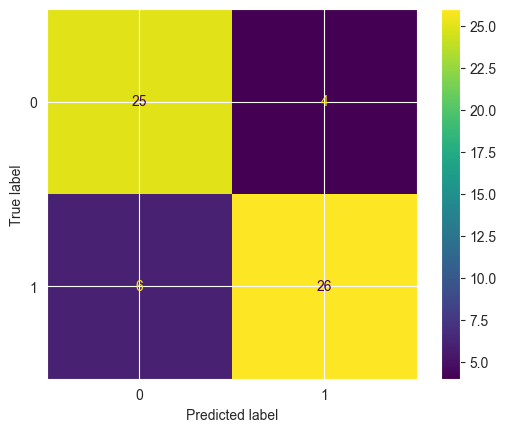

In [33]:
y_pred = modelgbm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print(f"Classification Report:")
print(report)

conf_m = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=modelgbm.classes_)
disp.plot()
plt.show()